## Importação de Bibliotecas


In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy

**bs4 (BeautifulSoup)** é usada para extrair dados de arquivos HTML e XML, útil para web scraping. \
**urllib.request** é utilizada para abrir e ler URLs, permitindo realizar requisições HTTP e baixar o conteúdo de páginas web. \
**nltk** é uma biblioteca para NLP que oferece ferramentas como tokenização, stemming e lematização. \
**spacy** é uma biblioteca para NLP, usada para tarefas como reconhecimento de entidades nomeadas e análise sintática.

## Download e Carregamento do Modelo de Linguagem


In [2]:
# Esse comando baixa o modelo de linguagem em português
!python -m spacy download pt

     --------------------------------------- 13.0/13.0 MB 18.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use
the full pipeline package name 'pt_core_news_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [3]:
# após o download, o modelo é carregado com:
pln = spacy.load('pt_core_news_sm')

## Processamento do Texto


Neste trecho, o texto é processado para que suas palavras (tokens) sejam identificadas e categorizadas. Peguei um trecho de uma evolução médica encontrada em busca pela internet.

In [4]:
documento = pln('MST, 60 anos, masculino. 14° de Internação Hospitalar e 4° dia na UTIHD: Pneumonia Comunitária Grave - Choque Séptico - IRA oligoanúrica dialítica')

In [5]:
type(documento)

spacy.tokens.doc.Doc

## Tokenização

Tokenização é o processo de dividir um texto em unidades menores chamadas "tokens". Esses tokens podem ser palavras, subpalavras, caracteres ou outras unidades semânticas. A tokenização é o primeiro passo em muitas tarefas de NLP, pois converte o texto bruto em uma forma estruturada que pode ser analisada.

Exemplo de tokenização e identificação de partes do discurso (POS tagging):

In [6]:
for token in documento:
    print (token.text, token.pos_)

MST PROPN
, PUNCT
60 NUM
anos NOUN
, PUNCT
masculino ADJ
. PUNCT
14 NUM
° NOUN
de ADP
Internação PROPN
Hospitalar PROPN
e CCONJ
4 NUM
° NUM
dia NOUN
na ADP
UTIHD PROPN
: PUNCT
Pneumonia PROPN
Comunitária PROPN
Grave PROPN
- PUNCT
Choque PROPN
Séptico PROPN
- PUNCT
IRA PROPN
oligoanúrica VERB
dialítica ADJ


## Lematização e Stemização

- **Lematização** é o processo de reduzir uma palavra à sua forma base ou lema, considerando o contexto morfológico. Por exemplo, "correrá" e "correndo" seriam reduzidos ao lema "correr".

- **Stemização** é o processo de reduzir uma palavra à sua raiz (stem), que pode não ser uma palavra gramaticalmente correta. Por exemplo, "correndo" poderia ser reduzido a "corr".


In [7]:
for token in documento:
    print (token.text, token.lemma_) #lematização

MST MST
, ,
60 60
anos ano
, ,
masculino masculino
. .
14 14
° °
de de
Internação Internação
Hospitalar Hospitalar
e e
4 4
° °
dia dia
na em o
UTIHD UTIHD
: :
Pneumonia Pneumonia
Comunitária Comunitária
Grave Grave
- -
Choque Choque
Séptico Séptico
- -
IRA IRA
oligoanúrica oligoanúrica
dialítica dialítico


In [8]:
import nltk
nltk.download ('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [9]:
stemmer = nltk.stem.RSLPStemmer() #Stemização
stemmer.stem('aprender')

'aprend'

In [10]:
for token in documento:
    print (token.text, token.lemma_, stemmer.stem(token.text))

MST MST mst
, , ,
60 60 60
anos ano ano
, , ,
masculino masculino masculin
. . .
14 14 14
° ° °
de de de
Internação Internação intern
Hospitalar Hospitalar hospital
e e e
4 4 4
° ° °
dia dia dia
na em o na
UTIHD UTIHD utihd
: : :
Pneumonia Pneumonia pneumon
Comunitária Comunitária comunitár
Grave Grave grav
- - -
Choque Choque choqu
Séptico Séptico sép
- - -
IRA IRA ira
oligoanúrica oligoanúrica oligoanúr
dialítica dialítico dialí


## Web Scraping


In [11]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Aspira%C3%A7%C3%A3o_pulmonar')
dados_html = bs.BeautifulSoup(dados, 'lxml')
paragrafos = dados_html.find_all('p')

Os parágrafos extraídos são então concatenados em um único texto para posterior processamento:

In [12]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [13]:
conteudo = conteudo.lower() # deixando tudo minúsculo

## Busca em textos com spaCy

O código configura um PhraseMatcher para localizar a palavra "pulmonar" no texto:

In [14]:
pln = spacy.load('pt_core_news_sm')

In [15]:
string = 'pulmonar'
token_pesquisa = pln(string)

In [16]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)

In [17]:
matcher.add('SEARCH', None, token_pesquisa)

In [18]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 2, 3),
 (8661325627334373315, 115, 116),
 (8661325627334373315, 203, 204),
 (8661325627334373315, 290, 291),
 (8661325627334373315, 304, 305),
 (8661325627334373315, 331, 332),
 (8661325627334373315, 355, 356),
 (8661325627334373315, 371, 372),
 (8661325627334373315, 419, 420),
 (8661325627334373315, 453, 454),
 (8661325627334373315, 607, 608)]

Os resultados são exibidos, destacando a palavra **pulmonar** pesquisada no contexto:



In [19]:
from IPython.display import display, HTML
numero_palavras = 50

texto = ""
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}<h1>'))
display(HTML(f"<p><strong>Resultados Encontrados:</strong> {len(matches)}</p>"))

for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
    texto += "<br /><br />"
    
display (HTML(f""" ... {texto} ..."""))

## Entidades no contexto de NLP

Reconhecimento de Entidades Nomeadas (NER)
Entidades, no contexto do NLP, referem-se a elementos específicos de um texto, como nomes de pessoas, organizações, locais, datas, etc. O processo de identificação dessas entidades é conhecido como Reconhecimento de Entidades Nomeadas (NER).

Exemplo de extração de entidades:

In [20]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

j95.4 MISC
o29.0 MISC
o74.0 MISC
w80.[3 MISC
brônquio LOC
brônquio LOC
john bonham PER
anestesia LOC


In [21]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Remoção de Stop Words
O código a seguir remove stop words (palavras comuns) do texto processado:

In [22]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [23]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)

In [24]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

## Geração de Nuvem de Palavras
A nuvem de palavras visualiza as palavras mais frequentes no texto filtrado:



In [25]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange','green','red','magenta'])

In [26]:
from wordcloud import WordCloud
cloud = WordCloud ( background_color = 'white', max_words = 50, colormap = color_map)

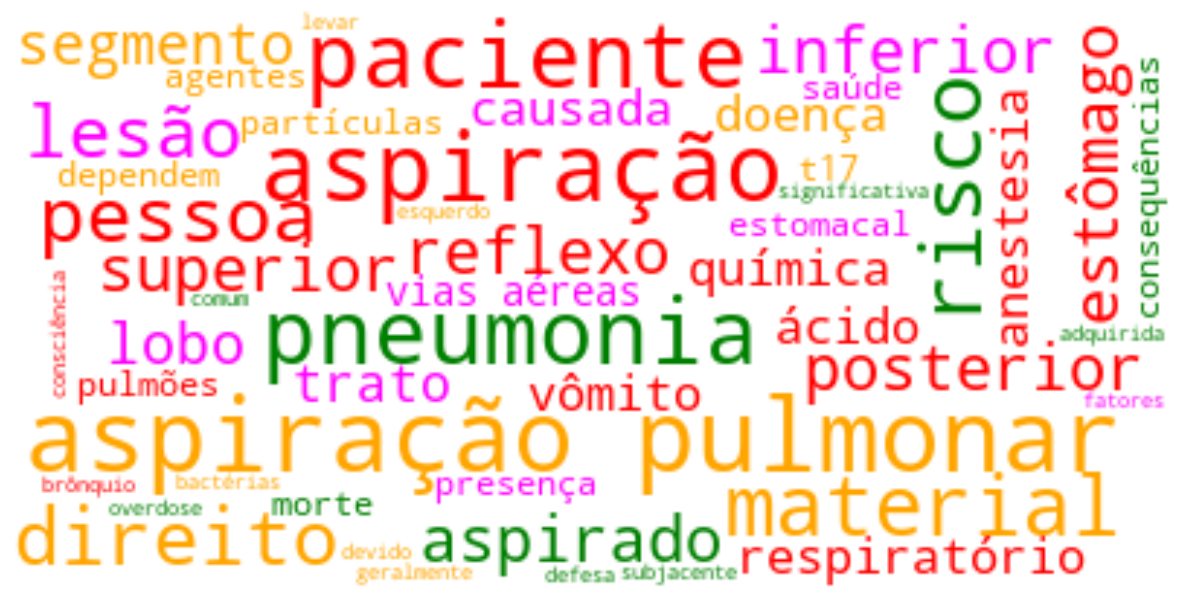

In [27]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize = (15,15))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()